<a href="https://colab.research.google.com/github/ananyaas2004-bit/Olympics_dataset_Project3/blob/main/Project3_olympics_medals_dataset_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Loading the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Loading the dataset
data = pd.read_csv("/content/Summer-Olympic-medals-1976-to-2008.csv", encoding="latin-1")
data.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [4]:
num_sports = data['Sport'].nunique()
print("Total number of sports:", num_sports)


Total number of sports: 28


In [4]:
#After dropping country code and event gender columns
data.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [5]:
#Checking for null values
print(data.isnull().sum())

City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64


In [4]:
#Removing the null values
data_cleaned=data.dropna()
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15316 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.4+ MB


In [ ]:
#Which city hosted maximum number of olympics
city_max=data[['City','Year']]
q1_data=city_max.drop_duplicates('Year')
q1_data


,City,Year
0,Montreal,1976.0
770,NaN,NaN
1422,Moscow,1980.0
2809,Los Angeles,1984.0
4268,Seoul,1988.0
5814,Barcelona,1992.0
7519,Atlanta,1996.0
9378,Sydney,2000.0
11393,Athens,2004.0
13391,Beijing,2008.0


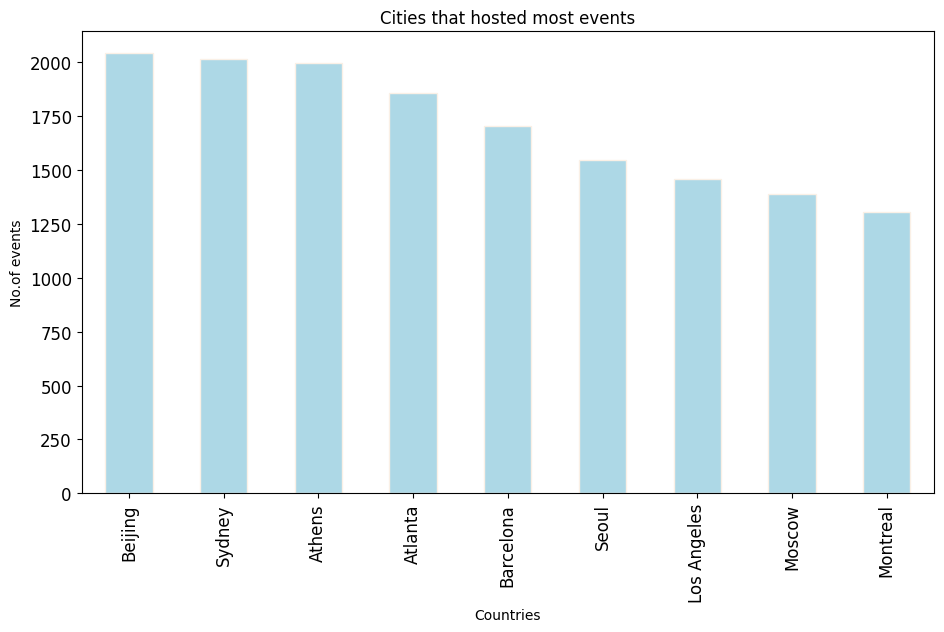

In [7]:
#Which city hosted most events
q2_data=data_cleaned['City'].value_counts()
q2_data.columns=['City','Count']
plt.figure(figsize=(11,6))
q2_data.plot(kind='bar',color='lightblue',fontsize=12,edgecolor='linen')
plt.title("Cities that hosted most events")
plt.xlabel("Countries")
plt.ylabel("No.of events")
plt.show()
#Beijing has host the most events in olympics from 1976 to 2008

In [8]:
#No.of Unique events
q3_data=data[['Sport','Discipline','Event']].drop_duplicates()
print("Total no.of unique events:",len(q3_data))

Total no.of unique events: 335


In [9]:
q3_data.head()


,Sport,Discipline,Event
0,Aquatics,Diving,3m springboard
4,Aquatics,Diving,10m platform
12,Aquatics,Swimming,4x100m freestyle relay
13,Aquatics,Swimming,400m freestyle
15,Aquatics,Swimming,1500m freestyle


<Axes: xlabel='Sport'>

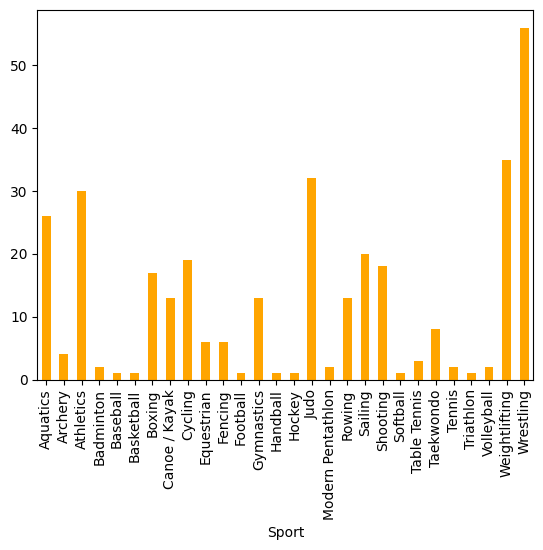

In [ ]:
q3_data.plot(kind='bar',color='orange')
#Sports with most events are Weightligting, wrestling, and Judo

In [ ]:
#Total medals won by top 20 countries
medal_by_country=data_cleaned.groupby('Country')['Medal'].count().sort_values(ascending=False)
medal_by_country.head(20)

,Medal
Country,
United States,1992
Soviet Union,1021
Australia,798
Germany,691
China,679
Russia,638
East Germany,626
Italy,486
Romania,482


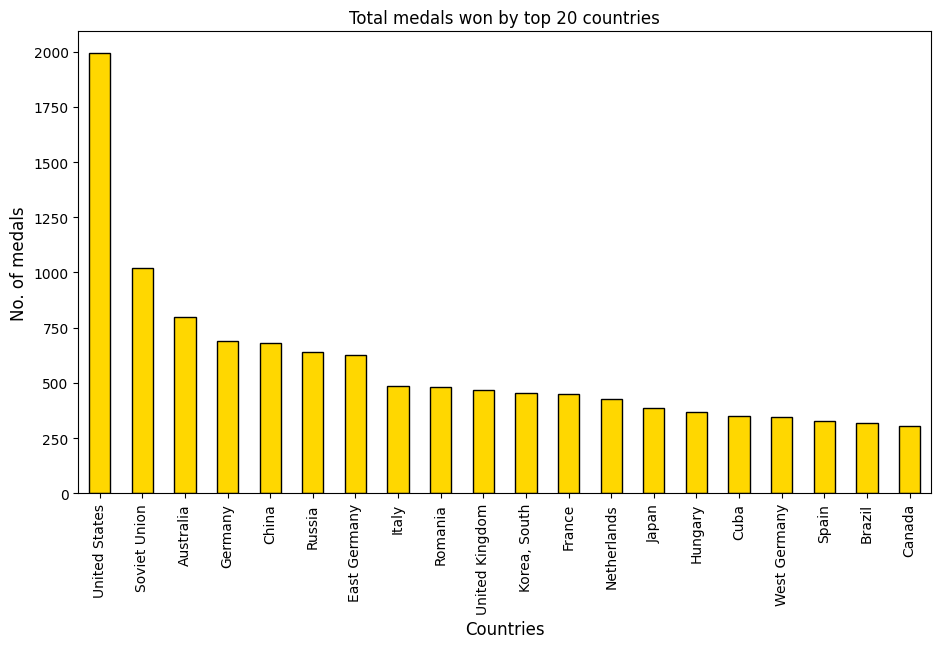

In [ ]:
#Bar chart of total medals won by top 20 countries
plt.figure(figsize=(11,6))
medal_by_country.head(20).plot(kind='bar',color='gold',edgecolor='black')
plt.title("Total medals won by top 20 countries")
plt.xlabel("Countries",fontsize=12)
plt.ylabel("No. of medals",fontsize=12)
plt.show()

In [ ]:
#Total medals won over the years
medal_over_years=data_cleaned.groupby('Year')['Medal'].count()
medal_over_years.head(10)

,Medal
Year,
1976.0,1305
1980.0,1387
1984.0,1459
1988.0,1546
1992.0,1705
1996.0,1859
2000.0,2015
2004.0,1998
2008.0,2042


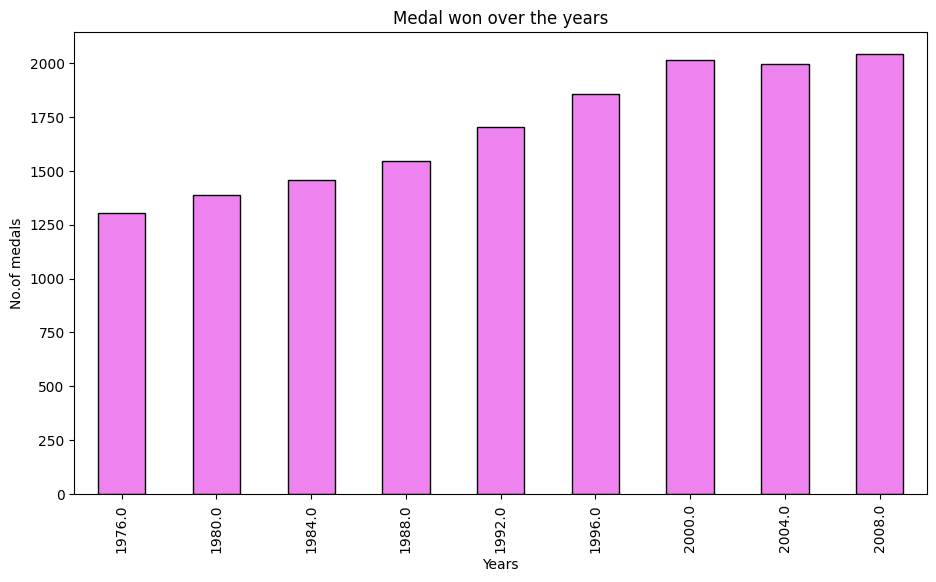

In [ ]:
plt.figure(figsize=(11,6))
medal_over_years.head(20).plot(kind='bar',color='violet',edgecolor='black')
plt.title("Medal won over the years")
plt.xlabel("Years")
plt.ylabel("No.of medals")
plt.show()


In [6]:
#Which country has won how many medals
q6_data = data[['Year', 'Country', 'Medal']]
q6_data = q6_data.groupby(['Year', 'Country',
'Medal'])['Country'].count().reset_index(name = 'Count')
q6_data['Medal'] = pd.Categorical(q6_data['Medal'],
categories=['Gold', 'Silver', 'Bronze'], ordered=True)
q6_data = q6_data.sort_values(ascending = [True, True, True],by = ['Year', 'Country','Medal'])
q6_data = q6_data.pivot( index = ['Year','Country'], columns = ['Medal'], values = ['Count']).reset_index()
q6_data = q6_data.replace(np.nan, 0)
q6_data['Sum'] = q6_data['Count', 'Bronze'] + q6_data['Count','Gold'] + q6_data['Count','Silver']
q6_data = q6_data.sort_values(ascending = [True, False],by =['Year','Sum'])
q6_data

Year        Country  Count                  Sum
Medal                          Gold Silver Bronze       
30     1976.0   Soviet Union  113.0   93.0   79.0  285.0
10     1976.0   East Germany   99.0   51.0   42.0  192.0
37     1976.0  United States   63.0   56.0   36.0  155.0
39     1976.0   West Germany   21.0   24.0   30.0   75.0
26     1976.0         Poland   18.0   29.0   26.0   73.0
..        ...            ...    ...    ...    ...    ...
542    2008.0          Sudan    0.0    1.0    0.0    1.0
548    2008.0           Togo    0.0    0.0    1.0    1.0
550    2008.0        Tunisia    1.0    0.0    0.0    1.0
556    2008.0      Venezuela    0.0    0.0    1.0    1.0
557    2008.0        Vietnam    0.0    1.0    0.0    1.0

[559 rows x 6 columns]

In [ ]:
#Gender distribution in events
genders=['Men','Women']
gender_count=data_cleaned['Gender'].value_counts()


,count
Gender,
Men,9388
Women,5928


In [ ]:
q5_data=data_cleaned.groupby(['Event','Gender'])['Gender'].count()
q5_data

Event                               Gender
+ 100kg (heavyweight)               Men        16
+ 100kg (super heavyweight)         Men        18
+ 105kg                             Men         9
+ 108kg, total (super heavyweight)  Men         3
+ 110kg, total (super heavyweight)  Men        15
                                             ... 
water polo                          Women     117
épée individual                     Men        27
                                    Women      12
épée team                           Men       114
                                    Women      30
Name: Gender, Length: 379, dtype: int64

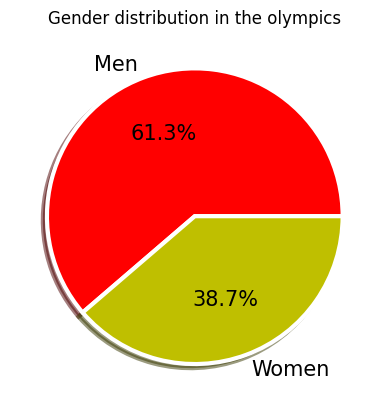

In [ ]:
#Pie chart showing gender distribution
plt.pie(gender_count,labels=genders,explode=[0,0],autopct="%0.1f%%",colors=['r','y'],shadow=True,textprops={'fontsize':15},wedgeprops={'linewidth':3,'edgecolor':'w'})
plt.title('Gender distribution in the olympics')
plt.show()

In [ ]:
#Maximum medals won by the athletes
athlete_medal=data_cleaned.groupby('Athlete')['Medal'].count().sort_values(ascending=False)
athlete_medal.head(10)

,Medal
Athlete,
"PHELPS, Michael",16
"FISCHER, Birgit",12
"ANDRIANOV, Nikolay",12
"TORRES, Dara",12
"THOMPSON, Jenny",12
"NEMOV, Alexei",12
"BIONDI, Matthew",11
"COUGHLIN, Natalie",11
"DITYATIN, Aleksandr",10


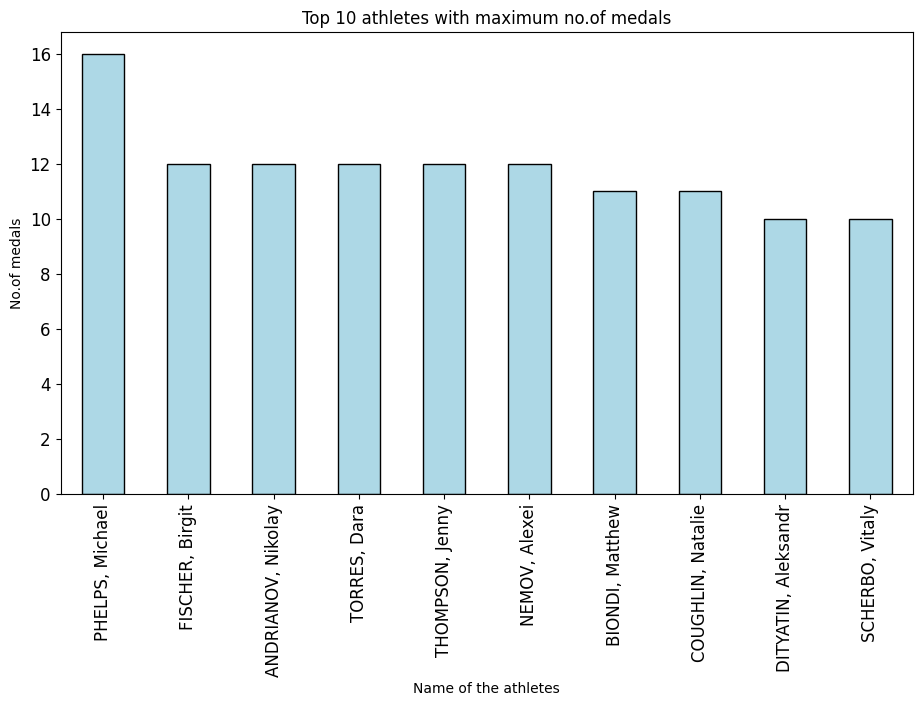

In [ ]:
#bar plot of top athletes with maximum medals
plt.figure(figsize=(11,6))
athlete_medal.head(10).plot(kind='bar',color='lightblue',edgecolor='black',fontsize=12)
plt.title("Top 10 athletes with maximum no.of medals")
plt.xlabel("Name of the athletes")
plt.ylabel("No.of medals")
plt.show()
#Phelps Michael is the top athlete with 16 medals

In [ ]:
#No. of medals won by each sport
sport_medal=data_cleaned.groupby('Sport')['Medal'].count().sort_values(ascending=False)
sport_medal.head(10)

,Medal
Sport,
Aquatics,2210
Athletics,1523
Rowing,1377
Hockey,817
Gymnastics,783
Handball,780
Volleyball,695
Canoe / Kayak,672
Football,669


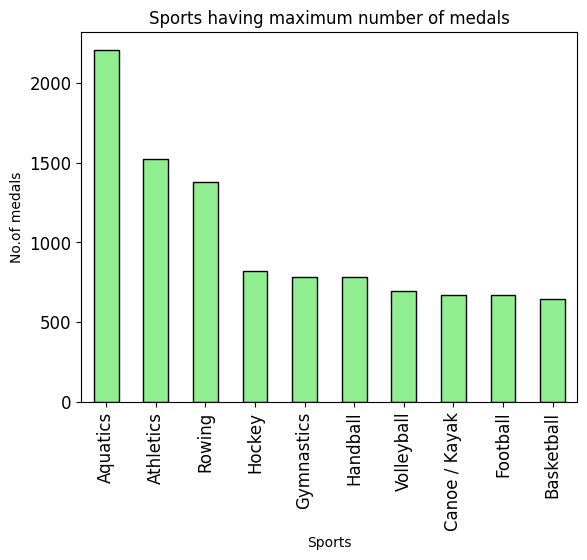

In [ ]:
#Sports having maximum no.of medals
sport_medal.head(10).plot(kind='bar',color='lightgreen',edgecolor='black',fontsize=12)
plt.title("Sports having maximum number of medals")
plt.xlabel("Sports")
plt.ylabel("No.of medals")
plt.show()

In [27]:
# Countries which dominated in each sport
sport_country_counts = (
    data_cleaned.groupby(['Sport', 'Country'])['Medal']
    .count()
    .reset_index(name='Medal_Count')
)
max_per_sport = sport_country_counts.groupby('Sport')['Medal_Count'].transform('max')
dominant_country_per_sport = sport_country_counts[sport_country_counts['Medal_Count'] == max_per_sport]
dominant_country_per_sport = dominant_country_per_sport.sort_values(by='Sport').reset_index(drop=True)
dominant_country_per_sport

,Sport,Country,Medal_Count
0,Aquatics,United States,578
1,Archery,"Korea, South",52
2,Athletics,United States,299
3,Badminton,China,47
4,Baseball,Cuba,111
5,Basketball,United States,192
6,Boxing,Cuba,56
7,Canoe / Kayak,Germany,96
8,Cycling,Australia,54
9,Equestrian,United States,73


In [36]:
#Players who have changed their discipline and still managed to win
athletes = data[['Athlete','Sport']].drop_duplicates()
athletes = athletes.groupby(['Athlete'])
for i,j in athletes:
  if len(j['Sport'].tolist()) >1:
    print(i,j['Sport'].tolist())



('BELOVA, Irina',) ['Athletics', 'Gymnastics']
('CHEN, Jing',) ['Table Tennis', 'Volleyball']
('DIMITROV, Stefan',) ['Volleyball', 'Weightlifting']
('GAVRILOV, Yuri',) ['Football', 'Handball']
('GONZALEZ, Raul',) ['Athletics', 'Handball']
('KOLESNIKOV, Nikolai',) ['Athletics', 'Weightlifting']
('KOVACS, Istvan',) ['Wrestling', 'Boxing']
('KOVALENKO, Alexandre',) ['Athletics', 'Aquatics']
('KUZNETSOV, Mikhail',) ['Rowing', 'Canoe / Kayak']
('KUZNETSOV, Nikolai',) ['Rowing', 'Cycling']
('LEE, Eun Kyung',) ['Archery', 'Hockey']
('LI, Na',) ['Aquatics', 'Fencing']
('LI, Ting',) ['Aquatics', 'Tennis']
('OVCHINNIKOVA, Elena',) ['Volleyball', 'Aquatics']
('ROMERO, Rebecca',) ['Rowing', 'Cycling']
('THOMPSON, Richard',) ['Baseball', 'Athletics']
('TOMA, Sanda',) ['Rowing', 'Canoe / Kayak']
('WANG, Liping',) ['Football', 'Athletics']
('WELLS, Matthew',) ['Hockey', 'Rowing']
('YANG, Wei',) ['Badminton', 'Gymnastics']
('YOUNG, Tim',) ['Rowing', 'Baseball']


/tmp/ipython-input-3381512202.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  q9_data = q6_data[['Year', 'Country','Sum']].groupby(['Year']).apply(lambda x : x.nlargest(5,'Sum'))
/tmp/ipython-input-3381512202.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  q9_data = q6_data[['Year', 'Country','Sum']].groupby(['Year']).apply(lambda x : x.nlargest(5,'Sum'))
/tmp/ipython-input-3381512202.py:9: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  q9_data = q6_data[['Year', 'Country','Sum']].groupby(['Year']).apply(lambda x :x.nlargest(5,'Sum'))['Country'].drop_duplicate

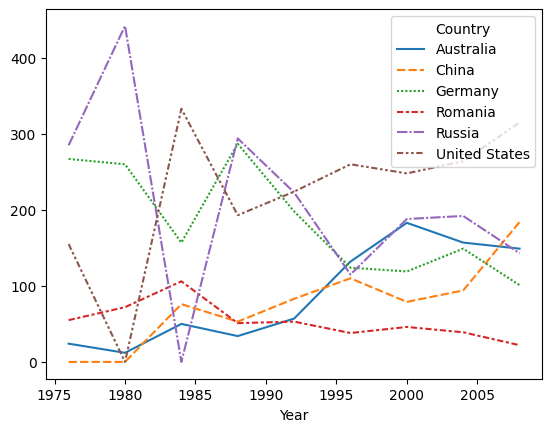

In [14]:
#Metrics of top 5 countries in the year 1976-2008
q9_data = q6_data[['Year', 'Country','Sum']].groupby(['Year']).apply(lambda x : x.nlargest(5,'Sum'))
q9_data = q9_data.pivot( index = ['Year'], columns = ['Country'], values = ['Sum']).reset_index()
q9_data.columns = q9_data.columns.droplevel(0)
# q9_data.columns = ['Year', 'Country', 'Gold', 'Silver','Bronze', 'Sum']
q9_data = q9_data.rename(columns={ q9_data.columns[0]: "Year"})
# temp =
q6_data.where(q6_data.Country.isin(q9_data.columns)).dropna()[["Year", "Country", "Sum"]]
# temp
q9_data = q6_data[['Year', 'Country','Sum']].groupby(['Year']).apply(lambda x :x.nlargest(5,'Sum'))['Country'].drop_duplicates()
temp =q6_data.where(q6_data.Country.isin(q9_data)).dropna()[["Year","Country", "Sum"]]
temp = temp.pivot(index = ['Year'], columns = ['Country'],values = ['Sum']).reset_index()
temp.columns = temp.columns.droplevel(0)
temp = temp.rename(columns={ temp.columns[0]: "Year" })
q9_data = temp.replace(np.nan, 0)
q9_data.Germany = q9_data.Germany + q9_data['East Germany'] + q9_data['West Germany']
q9_data.Russia = q9_data['Soviet Union'] + q9_data.Russia + q9_data['Unified team']
q9_data = q9_data.drop(['Yugoslavia','Poland','Korea, South','Italy','Hungary','Cuba','Canada','Bulgaria','East Germany', 'West Germany', 'Soviet Union', 'Unified team'], axis= 1)
q9_data =q9_data.set_index('Year')

import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(data=q9_data)
plt.show()



In [1]:
from google.colab import drive
drive.flush_and_unmount()
